<img src="logo.jpg" />

## [Pedram Jahangiry, Fall 2019](www.pedramjahangiry.com) 

# Regression Analysis: 
A linear Regression is a **linear approximation** of a **causal relationship** between two or more variables

## Polynomial Regression

Polynomial regression extends the linear model by adding extra predictors, obtainded by raising each of the original predictors to a power. This approach provides a simple way to provide a **non-linear fit** to data. 

First we need to import the libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

sns.set()  #if you want to use seaborn themes with matplotlib functions

### Why Polynomial Regression? 

Let's generate some random data set based on true model f(x)

$$y =f(x)= x + 2x^2- 3 x^3 + \epsilon$$

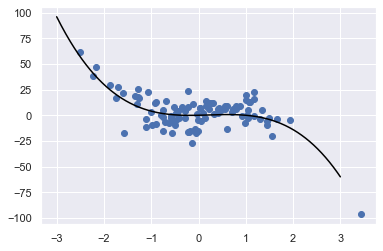

In [2]:
np.random.seed(102)
x = np.random.randn(100)
y = x + 2 * (x ** 2) -3 * (x ** 3) + 5*np.random.normal(0,2,100)
plt.scatter(x,y)

# let's plot the unobservable true model
w=np.linspace(-3,3,500)
z= w+2 * (w ** 2) -3 * (w ** 3)
plt.plot(w,z, c='black')
plt.show()

###  Polynomial transformation of the data

In [3]:
poly = PolynomialFeatures(degree =1)

In [4]:
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1
0,1.0,1.668068
1,1.0,0.925862
2,1.0,1.057997
3,1.0,-0.920339
4,1.0,1.299748


###  Splitting the data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

In [6]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     8.743
Date:                Wed, 25 Sep 2019   Prob (F-statistic):            0.00427
Time:                        15:00:04   Log-Likelihood:                -276.97
No. Observations:                  70   AIC:                             557.9
Df Residuals:                      68   BIC:                             562.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.5603      1.544      2.306      0.024       0.480       6.640
1             -4.7467      1.605     -2.957      0.004      -7.950      -1.543
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.104
Skew:                          -0.027   Prob(JB):                        0.949
Kurtosis:                       2.819   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting the train data regression function

In [7]:
y_predict_tr = model.predict(X_train)

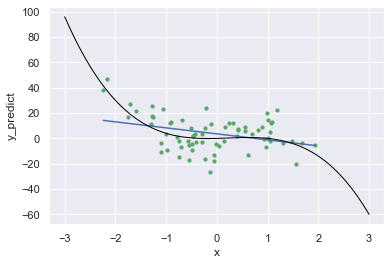

In [8]:
prediction_tr =pd.DataFrame(np.c_[X_train[1],y_predict_tr], columns=['x','y_predict'])
sns.lineplot(x='x',y='y_predict', data=prediction_tr)
plt.scatter(X_train[1], y_train, s=10, c='g')
plt.plot(w,z, c='black', linewidth=1)

plt.show()

###  comparing the MSE_train and MSE_test

In [9]:
y_predict_tr = model.predict(X_train)
MSE_train = np.mean(np.square(y_train - y_predict_tr))
round(MSE_train,2)

160.07

In [10]:
y_predict_te = model.predict(X_test)
MSE_test = np.mean(np.square(y_test - y_predict_te))
round(MSE_test,2)

430.32

### All in one function

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(x.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=100)

    # fit the transformed features to Linear Regression
    poly_model = sm.OLS(y_train, X_train).fit()
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)
    R2_train = round(poly_model.rsquared,2)
    Adj_R2_train = round(poly_model.rsquared_adj,2)
  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
 #     print("Traning model fit")
 #     print("R2_train = {}".format(R2_train))
 #     print("adj R2 = {}".format(Adj_R2_train))
    
 #     print("-------------------------------------------")
 #     print("MSE_train = {}".format(MSE_train))
 #     print("RMSE_train = {}".format(RMSE_train))

 #     print("-------------------------------------------")
 #     print("MSE_test = {}".format(MSE_test))
 #     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, MSE_train, MSE_test, RMSE_train, RMSE_test

    


In [12]:
my_polynomial_regression(poly_degree=3, X=x, y=y)

(3, 104.91, 104.11, 10.24, 10.2)

In [13]:
returns = []

for i in range (1,7):
    returns.append(my_polynomial_regression(poly_degree=i,X=x,y=y))
        
df = pd.DataFrame(returns, columns={'Degree','MSE_train','MSE_test','RMSE_train','RMSE_test'})

display(df)

,Degree,RMSE_test,MSE_train,RMSE_train,MSE_test
0,1,160.07,430.32,12.65,20.74
1,2,128.20,849.49,11.32,29.15
2,3,104.91,104.11,10.24,10.20
3,4,101.12,1119.15,10.06,33.45
4,5,98.84,1987.51,9.94,44.58
5,6,96.92,63427.80,9.84,251.85


,Degree,MSE_train,MSE_test,RMSE_train,RMSE_test
0,1,160.07,430.32,12.65,20.74
1,2,128.20,849.49,11.32,29.15
2,3,104.91,104.11,10.24,10.20
3,4,101.12,1119.15,10.06,33.45
4,5,98.84,1987.51,9.94,44.58
5,6,96.92,63427.80,9.84,251.85


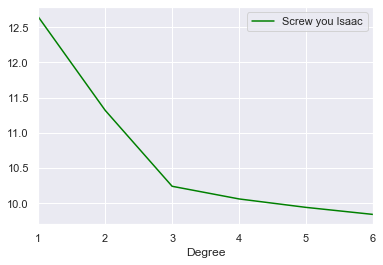

In [16]:
df.plot(kind='line', x='Degree',y='RMSE_train',color="green", label = 'Screw you Isaac')

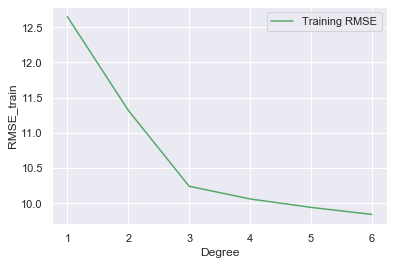

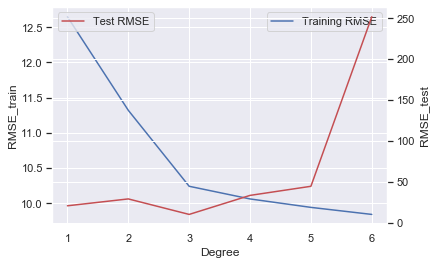

# Cross validation 

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [158]:
model = LinearRegression()

In [177]:
NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )
# cv is the number of Folds to speed up the process you can set the n_jobs=-1
# to see the list of valid scorings try:sorted(sklearn.metrics.SCORERS.keys())

In [178]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [179]:
NMSE

array([-102.82962355, -107.04670165,  -13.46080248, -154.4376244 ,
        -98.69723283, -216.23506971, -100.46897214,  -88.89420258,
        -74.89765726, -188.31478782])

In [180]:
RMSE = np.sqrt(-NMSE)
RMSE

array([10.14049425, 10.3463376 ,  3.66889663, 12.42729353,  9.9346481 ,
       14.70493352, 10.02342118,  9.42837221,  8.65434326, 13.72278353])

In [181]:
RMSE.mean()

10.30515237945682

In [182]:
RMSE.std()

2.886538043702673

###  Additional links:
1- Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

2- Going beyond linearity in python: https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

3- Validation set approach: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html